In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [163]:
companies = pd.read_csv('C:\\Users\\Anubhav\\MLShit\\Machine Learning Full\\Linear Regression\\1000_Companies.csv')
X = companies.iloc[:, :-1].values
Y = companies.iloc[:, 4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

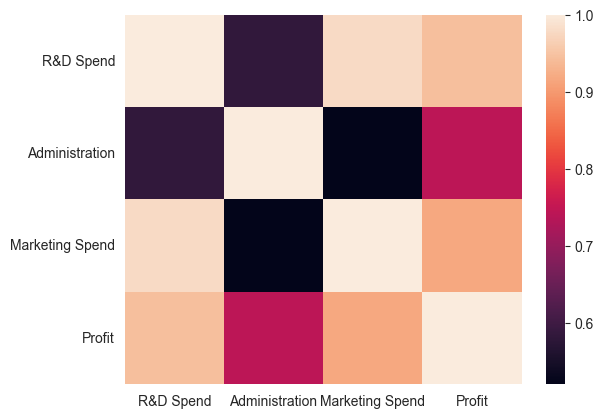

In [164]:
# data visualisation
# Building the corealation matrix

numeric_companies = companies.select_dtypes(include=[np.number])
sns.heatmap(numeric_companies.corr())

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoding only to categorical column (State)
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), [3])
    ],
    remainder='passthrough')

X = column_transformer.fit_transform(companies.iloc[:, :-1])

In [166]:
X = X[:, 1:]  # Avoiding dummy variable trap

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [168]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [169]:
Y_pred = regressor.predict(X_test)
Y_pred

array([ 89011.63300951,  87645.42814495,  94125.65830595, 175951.78331215,
        83151.32599134, 110364.50959702, 131291.86149181,  90697.67934011,
       164495.10927429,  53254.72552498,  66126.62757993, 150788.33684663,
       126208.68713549,  58499.43880868, 176906.14911163,  75040.07607901,
       118406.96124769, 163941.38987763, 175452.08147967, 182001.27441306,
       124149.89058331,  84882.92597374, 181273.87760198,  83355.08076348,
       104256.55289698, 100476.92009239,  56067.40757469,  56569.22768665,
        68076.62919888, 211074.62106979, 120942.47914064, 110988.7011797 ,
       101262.78260051, 138156.3159513 ,  63140.58013094, 108116.14592849,
       185954.58442658, 171705.28505902, 174913.15807036, 117829.18292491,
        96496.97182923, 164820.95408757, 106980.36456755,  50220.52992419,
       116669.32754381,  57792.69220536, 158653.68716676,  78622.80176725,
       159967.44484443, 131321.85273562, 185169.58182028, 174877.90678539,
        92974.4007779 ,  

In [170]:
regressor.coef_

array([-1.68503389e+02,  5.28304419e-01,  9.79095385e-01,  9.68577928e-02])

In [171]:
regressor.intercept_

np.float64(-66034.5938940465)

In [173]:
from sklearn.metrics import r2_score

correct = r2_score(Y_test, Y_pred) * 100
correct

93.12200957351894